In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

np.random.seed(1)

vec1 = np.array([0, 0, 0])
mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_for_class1 = np.random.multivariate_normal(vec1, mat1, 20).T
assert sample_for_class1.shape == (3, 20), "The dimension of the sample_for_class1 matrix is not 3x20"

vec2 = np.array([1, 1, 1])
mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_for_class2 = np.random.multivariate_normal(vec2, mat2, 20).T
assert sample_for_class2.shape == (3, 20), "The dimension of the sample_for_class2 matrix is not 3x20"

all_data = np.concatenate((sample_for_class1, sample_for_class2), axis=1)
assert all_data.shape == (3, 40), "The dimension of the all_data matrix is not 3x20"

In [15]:
mean_dim1 = np.mean(all_data[0, :])
mean_dim2 = np.mean(all_data[1, :])
mean_dim3 = np.mean(all_data[2, :])

mean_vector = np.array([[mean_dim1], [mean_dim2], [mean_dim3]])

print('The Mean Vector:\n', mean_vector)

scatter_matrix = np.zeros((3,3))
for i in range(all_data.shape[1]):
    scatter_matrix += (all_data[:, i].reshape(3, 1) - mean_vector).dot((all_data[:, i].reshape(3, 1) - mean_vector).T)
print('The Scatter Matrix is :\n', scatter_matrix)


The Mean Vector:
 [[0.41667492]
 [0.69848315]
 [0.49242335]]
The Scatter Matrix is :
 [[38.4878051  10.50787213 11.13746016]
 [10.50787213 36.23651274 11.96598642]
 [11.13746016 11.96598642 49.73596619]]


In [16]:
eig_val, eig_vec = np.linalg.eig(scatter_matrix)
for ev in eig_vec:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [17]:
# We Make a list of tuple containing (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# We then Sort list of tuples by the eigenvalue
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# verify that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

65.16936779078195
32.69471296321796
26.596203282097097


In [18]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [19]:
transformed = matrix_w.T.dot(all_data)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

In [20]:
transformed

array([[-0.12230714,  1.78582073, -0.72564846,  0.91911067, -0.48120545,
         1.26186049,  0.49974121, -1.36060904, -0.02630959,  0.20346559,
         1.02990798,  0.74684543, -0.76873682,  0.37184198, -0.48040292,
        -1.30433953, -0.57308381,  0.9748035 , -0.78806782, -1.23832629,
        -2.30009539, -1.73062935, -4.57170736,  0.04785487, -2.42616804,
        -1.15792646, -2.01497976, -1.98672036, -1.36534078, -2.76311357,
        -2.1041081 , -1.64296088, -1.09921946, -2.71718701, -1.38545546,
        -1.44331476, -0.58485289, -1.63411201, -1.21353834, -1.73760916],
       [-1.18757151, -1.16617976, -0.64124251, -1.74952646,  1.10969495,
         0.18151348, -0.97722286, -0.72412904, -0.42090149,  1.05827266,
         0.12619324,  0.77808138,  1.75701561, -1.00931473, -0.08774954,
         1.75869787, -0.09616466,  0.4009659 ,  0.49058694, -0.10791262,
         0.05492635, -0.3633537 , -0.13330484,  0.74907576, -0.53466984,
         1.6445517 , -0.90160187,  0.00885182, -0.

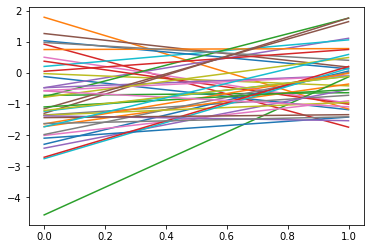

In [26]:
plt.plot(transformed)